In [11]:
%matplotlib inline

In [ ]:
!pip install mrcfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.4 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
import glob
import os,sys
import zipfile
import mrcfile

In [6]:
sys.path.append("/home/m112040012/vscode/topaz/topaz-master/topaz-master/")

In [7]:
from topaz.utils.data.loader import load_image
import topaz.mrc as mrc

In [4]:
# with zipfile.ZipFile('/content/drive/MyDrive/NT2C/10077/5lzf_data/10077/raw/10077_5-19.zip', 'r') as zip_ref:
#     zip_ref.extractall('10077_raw')

raw_path="/home/m112040012/vscode/10077_raw/"
raw = sorted(os.listdir(raw_path))

print('raw10077 4096*4096 number:',len(raw))

raw10077 4096*4096 number: 666


In [9]:
# denoise the EMPIAR-10025 micrographs with the full U-net model
# we set the patch size to 2048 to prevent running out of GPU RAM (these micrographs are large)
CUDA_VISIBLE_DEVICES=0,1,2
!python /home/m112040012/vscode/topaz/topaz-master/topaz-master/topaz/commands/denoise.py \
--patch-size 1024 \
--format jpg \
-o "/home/m112040012/vscode/data/10077/topaz_jpg_mrc/jpg_topaz_pre_jpg/" \
/home/m112040012/vscode/10077_raw_jpg/* \

# -o "/home/m112040012/vscode/data/10077/topaz_jpg_mrc/mrc_topaz_pre_jpg/" \
# /home/m112040012/vscode/10077_raw/* \

# using device=0 with cuda=True
# Loading model: unet
# 666 of 666 completed.


In [29]:
# with zipfile.ZipFile('/content/drive/MyDrive/NT2C/10077/5lzf_data/10077/topaz/10077_pre_topaz.zip', 'r') as zip_ref:
#     zip_ref.extractall('10077_pre_topaz2')

raw_path="/home/m112040012/vscode/data/10077/topaz_pre"
raw = sorted(os.listdir(raw_path))

print('10077_topaz 4096*4096 number:',len(raw))

10077_topaz 4096*4096 number: 667


In [34]:
# 指定資料夾路徑
folder_path = "/home/m112040012/vscode/10077_raw/"

# 取得資料夾中的所有檔案名稱，並按照順序排序
file_names = sorted(os.listdir(folder_path))[500:510]
#file_names = sorted(os.listdir(folder_path), key=lambda f: len(f))
# 建立一個空的列表來存儲所有 MRC 檔案的資料
print(file_names)
img_data_noise_list = []

# 遍歷所有檔案名稱，找出 MRC 檔案並讀取
for file_name in file_names:
    #print(file_name)
    file_path = os.path.join(folder_path, file_name)  # 檔案完整路徑
    #print(file_path)
    mrc=mrcfile.open(file_path, permissive=True) #你可以尝试将 permissive 参数设置为 True，以便在读取文件时忽略一些非严格的错误
    img_data_noise = mrc.data
    #print(img_data_noise.shape)
    img_data_noise_list.append(img_data_noise)


img_data_denoise_combined = np.stack(img_data_noise_list, axis=0)
img_data_denoise_combined = (img_data_denoise_combined - np.min(img_data_denoise_combined)) / (np.max(img_data_denoise_combined) - np.min(img_data_denoise_combined))
img_data_denoise_combined = img_data_denoise_combined.astype(np.float32)
print('clean data shape:', img_data_denoise_combined.shape)

raw_path="/home/m112040012/vscode/data/10077/topaz_pre"
#rawfile_names = sorted(os.listdir(raw_path))
rawfile_names = sorted(os.listdir(raw_path))[500:510]
# 建立一個空的列表來存儲所有 MRC 檔案的資料
print(rawfile_names)
rawimg_data_noise_list = []

# 遍歷所有檔案名稱，找出 MRC 檔案並讀取
for file_name in rawfile_names:
    #print(file_name)
    file_path = os.path.join(raw_path, file_name)  # 檔案完整路徑
    #print(file_path)
    mrc=mrcfile.open(file_path, permissive=True) #你可以尝试将 permissive 参数设置为 True，以便在读取文件时忽略一些非严格的错误
    img_data_noise = mrc.data
    #print(img_data_noise.shape)
    rawimg_data_noise_list.append(img_data_noise)


rawimg_data_denoise_combined = np.stack(rawimg_data_noise_list, axis=0)
rawimg_data_denoise_combined = (rawimg_data_denoise_combined - np.min(rawimg_data_denoise_combined)) / (np.max(rawimg_data_denoise_combined) - np.min(rawimg_data_denoise_combined))
rawimg_data_denoise_combined = rawimg_data_denoise_combined.astype(np.float32)
print('gan+clean data shape:', rawimg_data_denoise_combined.shape)

['sb1_210512 pos 1057 3-3_1.mrc', 'sb1_210512 pos 1058 1-1_1.mrc', 'sb1_210512 pos 1058 1-2_1.mrc', 'sb1_210512 pos 1058 1-3_1.mrc', 'sb1_210512 pos 1058 2-1_1.mrc', 'sb1_210512 pos 1058 2-2_1.mrc', 'sb1_210512 pos 1058 2-3_1.mrc', 'sb1_210512 pos 1058 3-1_1.mrc', 'sb1_210512 pos 1058 3-2_1.mrc', 'sb1_210512 pos 1058 3-3_1.mrc']
clean data shape: (10, 4096, 4096)
['sb1_210512 pos 1057 3-3_1.mrc', 'sb1_210512 pos 1058 1-1_1.mrc', 'sb1_210512 pos 1058 1-2_1.mrc', 'sb1_210512 pos 1058 1-3_1.mrc', 'sb1_210512 pos 1058 2-1_1.mrc', 'sb1_210512 pos 1058 2-2_1.mrc', 'sb1_210512 pos 1058 2-3_1.mrc', 'sb1_210512 pos 1058 3-1_1.mrc', 'sb1_210512 pos 1058 3-2_1.mrc', 'sb1_210512 pos 1058 3-3_1.mrc']
gan+clean data shape: (10, 4096, 4096)


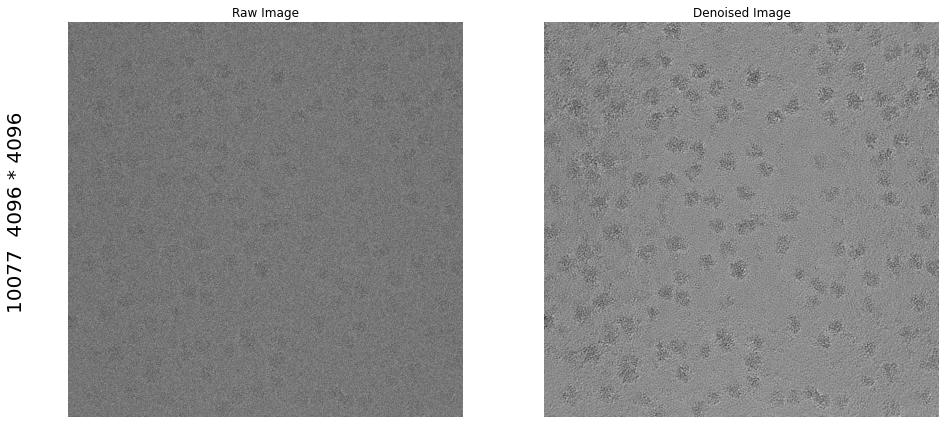

In [35]:
idx=0
plt.figure(figsize=(20, 6))

plt.figtext(-0.01, 0.5, '10077  4096 * 4096', fontsize=20, va='center', rotation='vertical', color='black')
# 第一张图像
plt.subplot(1, 3, 1)  # 1 表示 1 行, 2 表示 2 列, 1 表示第一个子图
plt.imshow(img_data_denoise_combined[idx], cmap='gray')
plt.axis('off')
plt.title('Raw Image')

plt.subplot(1, 3, 2)  # 1 表示 1 行, 2 表示 2 列, 2 表示第二个子图
plt.imshow(rawimg_data_denoise_combined[idx], cmap='gray')
plt.axis('off')
plt.title('Denoised Image')

plt.tight_layout()  # 自动调整子图布局
plt.show()

In [13]:
# denoise the EMPIAR-10025 micrographs with the full U-net model
# we set the patch size to 2048 to prevent running out of GPU RAM (these micrographs are large)
CUDA_VISIBLE_DEVICES=0,1,2
!python "/home/m112040012/vscode/topaz/topaz-master/topaz-master/topaz/commands/preprocess.py" \
--format jpg \
-j 10 \
--device 0 \
-o "/home/m112040012/vscode/data/10077/preprocess_jpg/" \
/home/m112040012/vscode/10077_raw/* \

In [15]:
folder_path = "/home/m112040012/vscode/data/10077/preprocess_jpg/"
file_names = sorted(os.listdir(folder_path))
#file_names = sorted(os.listdir(folder_path), key=lambda f: len(f))
print(len(file_names))

666


In [12]:
# 指定資料夾路徑
folder_path = "/home/m112040012/vscode/10077_raw/"

# 取得資料夾中的所有檔案名稱，並按照順序排序
file_names = sorted(os.listdir(folder_path))[9:17]
#file_names = sorted(os.listdir(folder_path), key=lambda f: len(f))
# 建立一個空的列表來存儲所有 MRC 檔案的資料
print(file_names)
img_data_noise_list = []

# 遍歷所有檔案名稱，找出 MRC 檔案並讀取
for file_name in file_names:
    #print(file_name)
    file_path = os.path.join(folder_path, file_name)  # 檔案完整路徑
    #print(file_path)
    mrc=mrcfile.open(file_path, permissive=True) #你可以尝试将 permissive 参数设置为 True，以便在读取文件时忽略一些非严格的错误
    img_data_noise = mrc.data
    #print(img_data_noise.shape)
    img_data_noise_list.append(img_data_noise)


img_data_denoise_combined = np.stack(img_data_noise_list, axis=0)
#img_data_denoise_combined = (img_data_denoise_combined - np.min(img_data_denoise_combined)) / (np.max(img_data_denoise_combined) - np.min(img_data_denoise_combined))
#img_data_denoise_combined = img_data_denoise_combined.astype(np.float32)
print('clean data shape:', img_data_denoise_combined.shape)

raw_path="/home/m112040012/vscode/data/10077/preprocess/"
#rawfile_names = sorted(os.listdir(raw_path))
rawfile_names = sorted(os.listdir(raw_path))[:]
# 建立一個空的列表來存儲所有 MRC 檔案的資料
print(rawfile_names)
rawimg_data_noise_list = []

# 遍歷所有檔案名稱，找出 MRC 檔案並讀取
for file_name in rawfile_names:
    #print(file_name)
    file_path = os.path.join(raw_path, file_name)  # 檔案完整路徑
    #print(file_path)
    mrc=mrcfile.open(file_path, permissive=True) #你可以尝试将 permissive 参数设置为 True，以便在读取文件时忽略一些非严格的错误
    img_data_noise = mrc.data
    #print(img_data_noise.shape)
    rawimg_data_noise_list.append(img_data_noise)


rawimg_data_denoise_combined = np.stack(rawimg_data_noise_list, axis=0)
#rawimg_data_denoise_combined = (rawimg_data_denoise_combined - np.min(rawimg_data_denoise_combined)) / (np.max(rawimg_data_denoise_combined) - np.min(rawimg_data_denoise_combined))
#rawimg_data_denoise_combined = rawimg_data_denoise_combined.astype(np.float32)
print('gan+clean data shape:', rawimg_data_denoise_combined.shape)

['sb1_210512 pos 1000 1-1_1.mrc', 'sb1_210512 pos 1000 1-2_1.mrc', 'sb1_210512 pos 1000 1-3_1.mrc', 'sb1_210512 pos 1000 2-1_1.mrc', 'sb1_210512 pos 1000 2-2_1.mrc', 'sb1_210512 pos 1000 2-3_1.mrc', 'sb1_210512 pos 1000 3-1_1.mrc', 'sb1_210512 pos 1000 3-2_1.mrc']
clean data shape: (8, 4096, 4096)
['sb1_210512 pos 1000 1-1_1.mrc']
gan+clean data shape: (1, 4096, 4096)


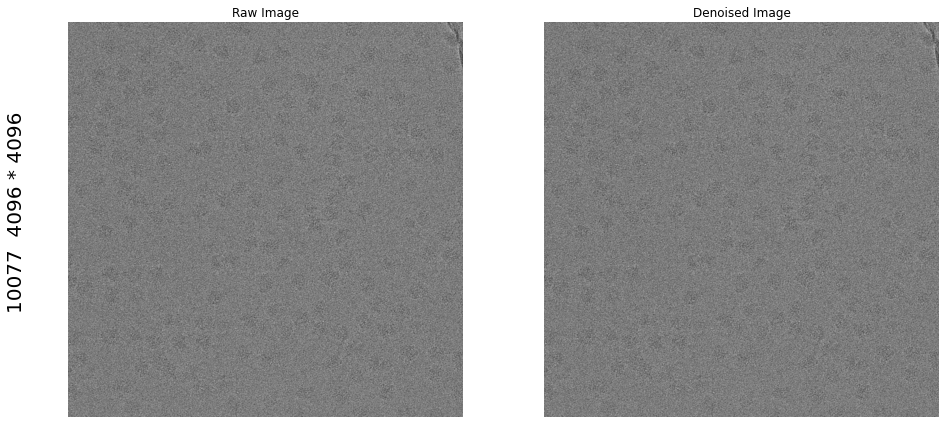

In [13]:
idx=0
plt.figure(figsize=(20, 6))

plt.figtext(-0.01, 0.5, '10077  4096 * 4096', fontsize=20, va='center', rotation='vertical', color='black')
# 第一张图像
plt.subplot(1, 3, 1)  # 1 表示 1 行, 2 表示 2 列, 1 表示第一个子图
plt.imshow(img_data_denoise_combined[idx], cmap='gray')
plt.axis('off')
plt.title('Raw Image')

plt.subplot(1, 3, 2)  # 1 表示 1 行, 2 表示 2 列, 2 表示第二个子图
plt.imshow(rawimg_data_denoise_combined[idx], cmap='gray')
plt.axis('off')
plt.title('Denoised Image')

plt.tight_layout()  # 自动调整子图布局
plt.show()

In [15]:
img_data_denoise_combined[idx].max(),rawimg_data_denoise_combined[idx].max()
print(img_data_denoise_combined[idx].max(),img_data_denoise_combined[idx].min())
print(rawimg_data_denoise_combined[idx].max(),rawimg_data_denoise_combined[idx].min())

7607.0 4877.0
5.2910447 -6.404838


In [18]:
mic=img_data_denoise_combined[idx]
mu = mic.mean()
std = mic.std()
x = (mic - mu)/std
print(x.max(),x.min())
mic=rawimg_data_denoise_combined[idx]
mu = mic.mean()
std = mic.std()
x = (mic - mu)/std
print(x.max(),x.min())

5.6026874 -5.2340097
5.602691 -5.2340016
